In [1]:
import os
# from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime
# import pandas as pd
import xarray as xr
import seaborn
from scipy import signal

In [47]:
# fileLocation = '/Users/tennismichel/Coding/Python/DLR_LIDAR/Data'
fileLocation = '../../v8'
fileName = "20171130-0051_T10Z900_stats.nc"
# fileName = "20180118-0253_T15Z900.nc"
path = os.path.join(fileLocation, fileName)

In [48]:
DS = xr.open_dataset(path, decode_times=False)
DS.time.values = DS.time.values / 1000

DS = xr.decode_cf(DS, decode_coords = True, decode_times = True) 

x = DS.time.attrs
DS.time_offset

<xarray.DataArray 'time_offset' (value: 1)>
array([1512000000], dtype=uint32)
Dimensions without coordinates: value

In [45]:
fileName = "20171130-0051_ch3_T10Z900.nc"
path = os.path.join(fileLocation, fileName)
DS = xr.open_dataset(path, decode_times=False)
DS

<xarray.Dataset>
Dimensions:                 (altitude: 1600, channels: 1, time: 111, value: 1)
Coordinates:
  * time                    (time) uint32 3915000 3975000 ... 10455000 10515000
  * altitude                (altitude) uint32 0 100 200 ... 159700 159800 159900
Dimensions without coordinates: channels, value
Data variables:
    station_latitude        (value) float64 ...
    station_longitude       (value) float64 ...
    station_height          (value) uint32 ...
    time_offset             (value) uint32 ...
    altitude_offset         (value) uint32 ...
    wavelength              (channels) float64 ...
    zenith_cosine           (time) float64 ...
    z0                      (time) uint32 ...
    integration_start_time  (time) uint32 ...
    integration_end_time    (time) uint32 ...
    max_countrate           (time) uint32 ...
    countrate_limit_bin     (time) uint32 ...
    temperature             (time, altitude) float32 ...
    temperature_err         (time, altitude)

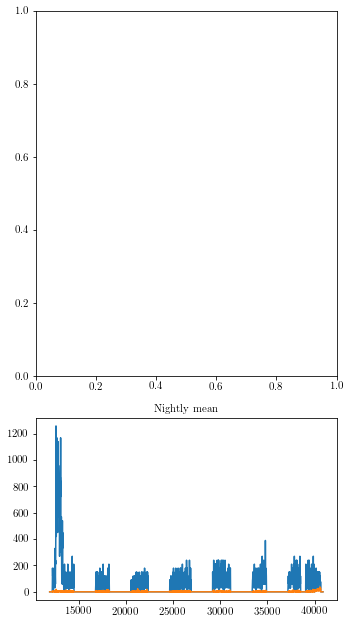

In [36]:
# matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
# plt.rcParams['font.family'] = "sans-serif"
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(5,10), gridspec_kw={'height_ratios': [2, 1]})

## Mean Plot (altitude vs. temperature)
# ax1.plot('time', 'signal_ch0', data=DS)
ax1.plot('time', 'signal_ch2', data=DS)
# ax1.plot('time', 'signal_ch3', data=DS)
# ax1.plot('time', 'background_ch0', data=DS)
# ax1.plot('time', 'background_ch1', data=DS)
ax1.plot('time', 'background_ch2', data=DS)
# ax1.plot('time', 'background_ch3', data=DS)


# ax1.set_aspect('1.4')

# Labels 
ax1.set_title('Nightly mean')

fig.tight_layout(rect=[0, 0, 1, 0.88]) # tuple (left, bottom, right, top),
# annotate() for fixed ratios